In [1]:
# 开始加载环境
import pandas as pd
import numpy as np
# 从这里开始绘制箱线图表示误差的大小
from pandas.plotting import andrews_curves

# 忽略烦人的红色提示
# import warnings
# warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split,cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score,average_precision_score
from sklearn import model_selection

from sklearn.utils import shuffle
import seaborn as sns
sns.set_style("whitegrid")

# 自定义颜色
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# 欢饮语
print("欢迎来到Czy的快乐星球")

欢迎来到Czy的快乐星球


In [2]:
# 读取测试数据
df = pd.read_csv("2_data_deal_smote.csv")
X = df.iloc[:,:-1]
Y = df["label"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score = 'accuracy'

# LogisticRegressionCV 

In [3]:
from time import time
a = time()
from sklearn.linear_model import RidgeClassifier, LogisticRegressionCV, Perceptron
def LogisticRegressionCV_mdoel(X, Y, cv, score):
    LogisticRegressionCV_auto = LogisticRegressionCV(random_state=0,
                                                     n_jobs=-1,
                                                     max_iter=10000,penalty='l2')
 
    # 搜索的参数是para
    param_dict = {
        "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        "class_weight": ['none', 'balanced'],
    }
    estimator = GridSearchCV(estimator=LogisticRegressionCV_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)

    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2, LogisticRegressionCV_auto = LogisticRegressionCV_mdoel(
    X, Y, cv, score)
print(LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2,
      LogisticRegressionCV_auto)

{'class_weight': 'none', 'solver': 'liblinear'} 0.7574333800841514 LogisticRegressionCV(class_weight='none', max_iter=10000, n_jobs=-1,
                     random_state=0, solver='liblinear')


# SGDClassifier

In [4]:
from sklearn.linear_model import SGDClassifier
def SGDClassifier_model(X, Y, cv, score):

    # 首先实例化各个回归方法
    SGDClassifier_auto = SGDClassifier(random_state=0,n_jobs=-1,max_iter=10000,class_weight='balanced')
    param_dict = {"penalty":['l2','elasticnet','l1'],  #
                  "loss":[ 'modified_huber', 'log'], #'hinge'
                  "average":[True,False],
                  "warm_start":[True,False],
                  "early_stopping":[True,False],
                  "fit_intercept":[True,False],
                 }
    estimator = GridSearchCV(estimator = SGDClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = score)
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_


SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto = SGDClassifier_model(X, Y, cv, score)
print(SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto)


{'average': False, 'early_stopping': False, 'fit_intercept': True, 'loss': 'modified_huber', 'penalty': 'l1', 'warm_start': True} 0.72945301542777 SGDClassifier(class_weight='balanced', loss='modified_huber', max_iter=10000,
              n_jobs=-1, penalty='l1', random_state=0, warm_start=True)


# LinearDiscriminantAnalysis

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LinearDiscriminantAnalysis_model(X, Y, cv, score):

    # 首先实例化各个判别分析方法
    LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis()
    param_dict = {
        "solver": ['svd', 'lsqr'],  #, 'eign' 不可以用
        "store_covariance": [True, False],
    }
    estimator = GridSearchCV(estimator=LinearDiscriminantAnalysis_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


LinearDiscriminantAnalysis_auto_tmp_1, LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis_model(
    X, Y, cv, score)
print(LinearDiscriminantAnalysis_auto_tmp_1,
      LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto)

{'solver': 'svd', 'store_covariance': True} 0.7033660589060309 LinearDiscriminantAnalysis(store_covariance=True)


In [6]:
# from sklearn.svm import LinearSVC
# def LinearSVC_model(X, Y, cv, score):  # 这就是感知机
#     # 首先实例化各个回归方法
#     LinearSVC_auto = LinearSVC(random_state=0, max_iter=10000,penalty='l2')
#     param_dict = {
#         "loss": ['hinge', 'squared_hinge'],
# #         "dual": [True, False],
# #         "fit_intercept": [True, False],
# #         "class_weight": ['none', 'balanced'],
#     }
#     estimator = GridSearchCV(estimator=LinearSVC_auto,
#                              param_grid=param_dict,
#                              cv=cv,
#                              n_jobs=-1,
#                              scoring=score)
#     estimator.fit(X, Y)
#     return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


# LinearSVC_auto_tmp_1, LinearSVC_auto_tmp_2, LinearSVC_auto = LinearSVC_model(
#     X, Y, cv, score)
# print(LinearSVC_auto_tmp_1, LinearSVC_auto_tmp_2, LinearSVC_auto)

In [7]:
# SVC

In [8]:
from sklearn.svm import SVC
def SVC_model(X, Y, cv, score):  # 这就是感知机
    # 首先实例化各个回归方法
    SVC_auto = SVC(random_state=0, probability=True,class_weight='balanced')
    param_dict = {
        "gamma": ['scale', 'auto'],
        "kernel": ['linear', 'rbf', 'sigmoid'],  # 'precomputed' 这个参数对于X有额外的要求,取消 , 'poly' 主要是因为算起来太慢了
        "shrinking": [True, False],
    }
    estimator = GridSearchCV(estimator=SVC_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto = SVC_model(X, Y, cv, score)
print(SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto)

{'gamma': 'scale', 'kernel': 'linear', 'shrinking': True} 0.7250818139317439 SVC(class_weight='balanced', kernel='linear', probability=True, random_state=0)


In [9]:
from sklearn.tree import DecisionTreeClassifier


def DecisionTreeClassifier_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    DecisionTreeClassifier_auto = DecisionTreeClassifier(
        random_state=0, class_weight='balanced')
    param_dict = {
        "criterion": ['gini', 'entropy'],
        "splitter": ['best', 'random'],
        "max_features": ['auto', 'sqrt', 'log2'],
    }
    estimator = GridSearchCV(estimator=DecisionTreeClassifier_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2, DecisionTreeClassifier_auto = DecisionTreeClassifier_model(
    X, Y, cv, score)
print(DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2,
      DecisionTreeClassifier_auto)

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'} 0.9004207573632538 DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       random_state=0)


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier_auto_ada = DecisionTreeClassifier_auto
def AdaBoostClassifier_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    AdaBoostClassifier_auto = AdaBoostClassifier(random_state=0)
    param_dict = {
                 "algorithm":['SAMME', 'SAMME.R']}
    estimator = GridSearchCV(estimator = AdaBoostClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring =score)
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto = AdaBoostClassifier_model(X, Y, cv, score)
print(AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto)



{'algorithm': 'SAMME.R'} 0.8984104721832631 AdaBoostClassifier(random_state=0)


In [11]:
from sklearn.ensemble import BaggingClassifier
def BaggingClassifier_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    BaggingClassifier_auto = BaggingClassifier(random_state=0, n_jobs=-1)
    param_dict = {  # "n_estimators":[10,30,50,70,90,110],
        "bootstrap": ["True", "False"],
        "bootstrap_features": ["True", "False"],
    }
    estimator = GridSearchCV(estimator=BaggingClassifier_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2, BaggingClassifier_auto = BaggingClassifier_model(
    X, Y, cv, score)
print(BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2,
      BaggingClassifier_auto)

{'bootstrap': 'True', 'bootstrap_features': 'True'} 0.8876344086021504 BaggingClassifier(bootstrap='True', bootstrap_features='True', n_jobs=-1,
                  random_state=0)


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
def GradientBoostingClassifier_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    GradientBoostingClassifier_auto = GradientBoostingClassifier(random_state=0)
    param_dict = {"loss": ["deviance", "exponential"],
                  #                   "n_estimators":[10,30,50,70,90,110],
                  #                  "learning_rate":[0,0.5,1,1.5,2],
                  "criterion": ['friedman_mse', 'mse', "mae"],
                  "max_features": ["auto", "sqrt", "log2"]}
    estimator = GridSearchCV(estimator=GradientBoostingClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto = GradientBoostingClassifier_model(X, Y, cv, score)
print(GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'sqrt'} 0.9134174848059841 GradientBoostingClassifier(loss='exponential', max_features='sqrt',
                           random_state=0)


In [13]:
from sklearn.ensemble import RandomForestClassifier
def RandomForestClassifier_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    RandomForestClassifier_auto = RandomForestClassifier(
        random_state=0, n_jobs=-1, class_weight="balanced")
    param_dict = {
        #                   "n_estimators":[10,30,50,70,90,110],
        "criterion": ['gini', 'entropy'],
        "max_features": ["auto", "sqrt", "log2"],
        #         "": ['none', 'balanced', "balanced_subsample"],
        "bootstrap": ["True", "False"],
        "oob_score": ["True", "False"],
    }
    estimator = GridSearchCV(estimator=RandomForestClassifier_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2, RandomForestClassifier_auto = RandomForestClassifier_model(
    X, Y, cv, score)
print(RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2,
      RandomForestClassifier_auto)

{'bootstrap': 'True', 'criterion': 'gini', 'max_features': 'auto', 'oob_score': 'True'} 0.9221131369798972 RandomForestClassifier(bootstrap='True', class_weight='balanced', n_jobs=-1,
                       oob_score='True', random_state=0)


In [14]:
# import xgboost as xgb
# from xgboost import plot_importance
# def xgboost_model(X, Y, cv, score):

#     xgboost_auto = xgb.XGBClassifier(random_state=0, n_jobs=1)
#     param_dict = {"maximize": ["True", "False"],
#                   "objective": ['binary:logistic','binary:hinge'],  # reg:linear回归时使用
#                   }
#     estimator = GridSearchCV(estimator=xgboost_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring=score)
#     estimator.fit(X, Y)
#     return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# xgboost_auto_tmp_1, xgboost_auto_tmp_2, xgboost_auto = xgboost_model(X, Y, cv, score)
# print(xgboost_auto_tmp_1, xgboost_auto_tmp_2, xgboost_auto)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
def KNeighborsClassifier_model(X, Y, cv, score):
    KNeighborsClassifier_auto = KNeighborsClassifier(n_jobs=1)
    param_dict = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  "weights": ['uniform', 'distance'],
                  "p": [1, 2],
                  }
    estimator = GridSearchCV(estimator=KNeighborsClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1,
                             scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto = KNeighborsClassifier_model(X, Y, cv, score)
print(KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'} 0.9328658251519402 KNeighborsClassifier(n_jobs=1, n_neighbors=2, p=1, weights='distance')


In [16]:
# from sklearn.neighbors import NearestNeighbors
# def NearestNeighbors_model(X, Y, cv, score):
#     # 首先实例化各个回归方法
#     NearestNeighbors_auto = NearestNeighbors(n_jobs=1)
#     param_dict = {
#         #                 "radius":[0.5, 1, 1.5, 4],
#         "p": [1, 2],
#         "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     }
#     estimator = GridSearchCV(estimator=NearestNeighbors_auto, param_grid=param_dict, cv=cv, n_jobs=-1,
#                              scoring=score)
#     estimator.fit(X, Y)
#     return estimator.best_params_, estimator.best_score_, estimator.best_estimator_



# NearestNeighbors_auto_tmp_1,  NearestNeighbors_auto_tmp_2, NearestNeighbors_auto = NearestNeighbors_model(X, Y, cv, score)
# print(NearestNeighbors_auto_tmp_1,  NearestNeighbors_auto_tmp_2, NearestNeighbors_auto)

In [17]:
from sklearn.naive_bayes import BernoulliNB
def BernoulliNB_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    BernoulliNB_auto = BernoulliNB()
    param_dict = {"fit_prior": ["True", "False"],
                  }
    estimator = GridSearchCV(estimator=BernoulliNB_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring=score)
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto = BernoulliNB_model(X, Y, cv, score)
print(BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto)

{'fit_prior': 'True'} 0.7184198223468912 BernoulliNB(fit_prior='True')


In [18]:
from sklearn.naive_bayes import GaussianNB
def GaussianNB_model(X, Y, cv, score):
    # 首先实例化各个回归方法
    GaussianNB_auto = GaussianNB()
    param_dict = {}
    estimator = GridSearchCV(estimator = GaussianNB_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = score)
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto = GaussianNB_model(X, Y, cv, score)
print(GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto)


{} 0.6276764843384759 GaussianNB()


In [19]:
b = time()
time_all = b -a 
print(time_all)

34.0125789642334


{'class_weight': 'none', 'solver': 'liblinear'} 0.7574333800841514 LogisticRegressionCV(class_weight='none', max_iter=10000, n_jobs=-1,
                     random_state=0, solver='liblinear')
{'average': False, 'early_stopping': False, 'fit_intercept': True, 'loss': 'modified_huber', 'penalty': 'l1', 'warm_start': True} 0.72945301542777 SGDClassifier(class_weight='balanced', loss='modified_huber', max_iter=10000,
              n_jobs=-1, penalty='l1', random_state=0, warm_start=True)
{'solver': 'svd', 'store_covariance': True} 0.7033660589060309 LinearDiscriminantAnalysis(store_covariance=True)
{'gamma': 'scale', 'kernel': 'linear', 'shrinking': True} 0.7250818139317439 SVC(class_weight='balanced', kernel='linear', probability=True, random_state=0)
{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'} 0.9004207573632538 DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       random_state=0)
{'algorithm': 'SAMME.R'} 0.8984104721832631 Ada

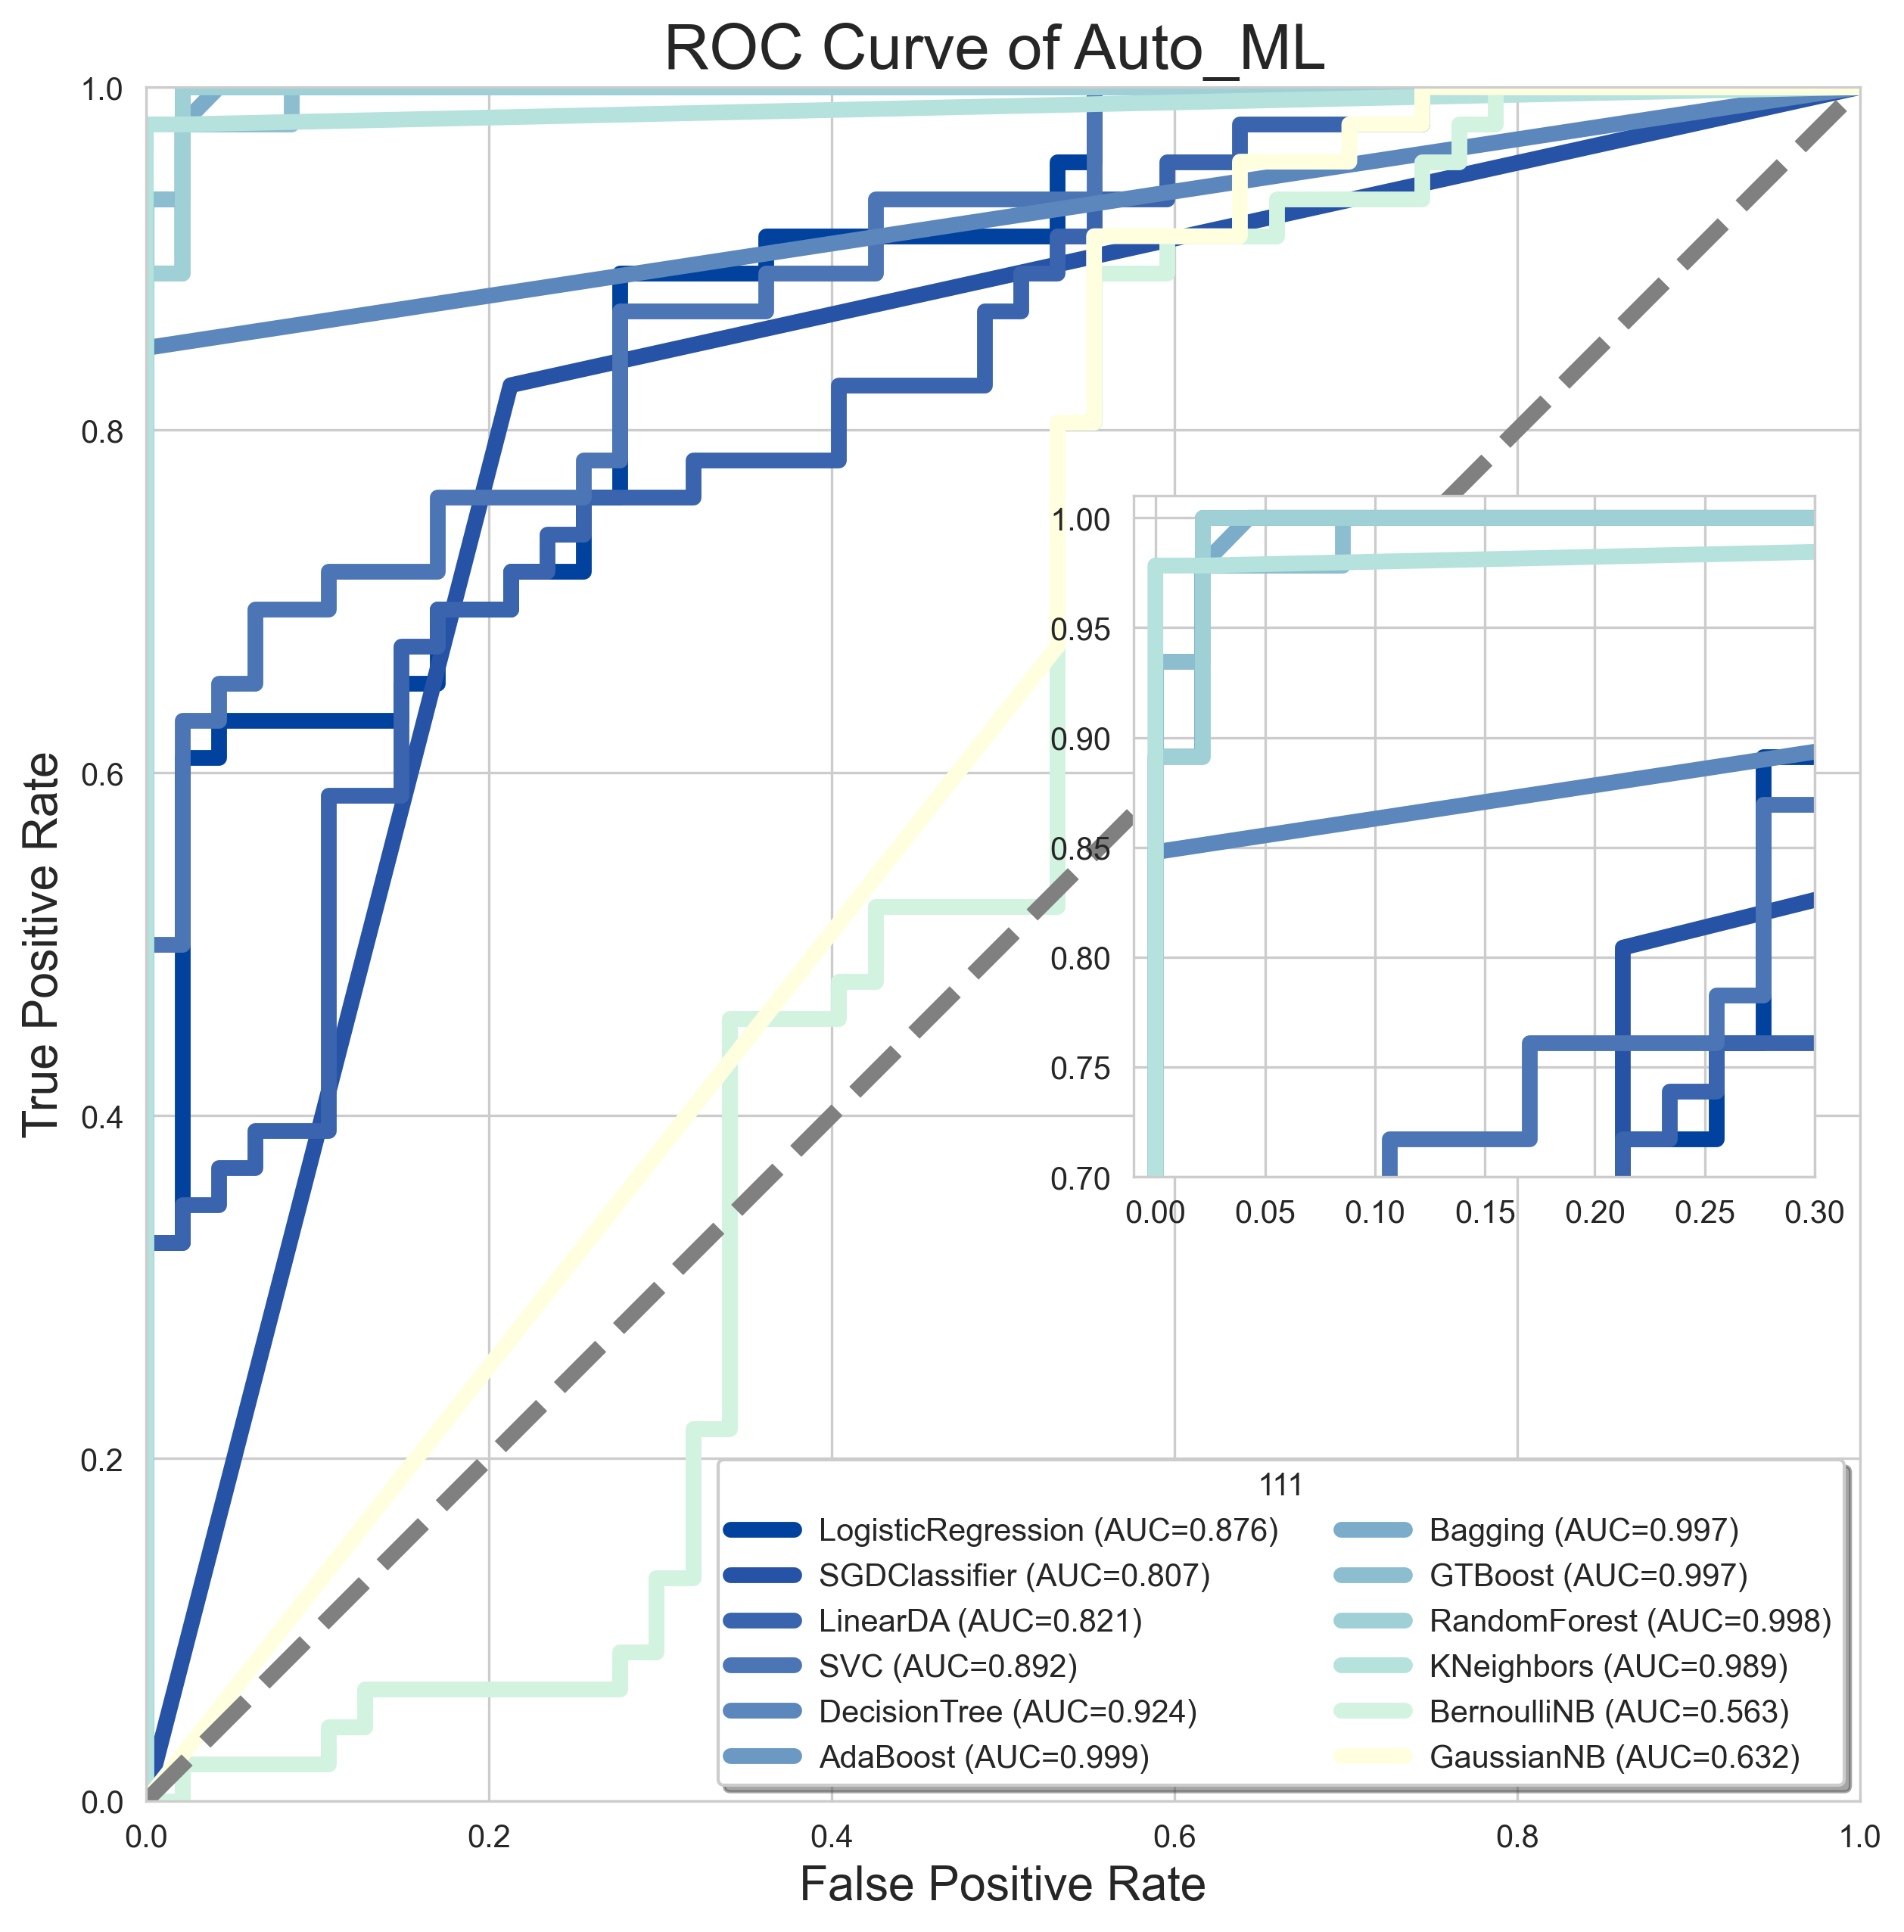

32.75109577178955


In [20]:
a = time()
def binary_ROC(X,Y,k,fig_name,score):
    """
    关于名字：binary_ROC 是全部进行二分类的Roc图像绘制
    data: dataframe
    X：   X变量数据的名字
    Y：   label变量的列名
    cv:   表示需要的折叠次数
    :return:   fig 返回ROC图
    """
    # 初始化分层搜索
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

    # 调用上文的自动机器学习模型
    LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2, LogisticRegressionCV_auto = LogisticRegressionCV_mdoel(
        X, Y, cv, score)
    print(LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2,
          LogisticRegressionCV_auto)
    SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto = SGDClassifier_model(X, Y, cv, score)
    print(SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto)
    LinearDiscriminantAnalysis_auto_tmp_1, LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis_model(
        X, Y, cv, score)
    print(LinearDiscriminantAnalysis_auto_tmp_1,
          LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto)
    SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto = SVC_model(X, Y, cv, score)
    print(SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto)
    DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2, DecisionTreeClassifier_auto = DecisionTreeClassifier_model(
        X, Y, cv, score)
    print(DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2,
          DecisionTreeClassifier_auto)
    AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto = AdaBoostClassifier_model(X,
                                                                                                                     Y,
                                                                                                                     cv,
                                                                                                                     score)
    print(AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto)
    BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2, BaggingClassifier_auto = BaggingClassifier_model(
        X, Y, cv, score)
    print(BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2,
          BaggingClassifier_auto)
    GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto = GradientBoostingClassifier_model(
        X, Y, cv, score)
    print(GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto)
    RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2, RandomForestClassifier_auto = RandomForestClassifier_model(
        X, Y, cv, score)
    print(RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2,
          RandomForestClassifier_auto)
    KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto = KNeighborsClassifier_model(
        X, Y, cv, score)
    print(KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto)
    BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto = BernoulliNB_model(X, Y, cv, score)
    print(BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto)
    GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto = GaussianNB_model(X, Y, cv, score)
    print(GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto)

    colors = [
        '#00429d', '#2653a5', '#3a64ad', '#4b75b4', '#5b87bc', '#6b99c3',
        '#7bacca', '#8cbed0', '#9fd0d6', '#b5e2dc', '#d1f3e0', '#ffffe0'
    ]
    #     创建model字典，其中的最佳模型就是取自上文的model
    algorithm_models = [
        LogisticRegressionCV_auto,
        SGDClassifier_auto,
        LinearDiscriminantAnalysis_auto,
        SVC_auto,
        DecisionTreeClassifier_auto,
        AdaBoostClassifier_auto,
        BaggingClassifier_auto,
        GradientBoostingClassifier_auto,
        RandomForestClassifier_auto,
        KNeighborsClassifier_auto,
        GaussianNB_auto,
        BernoulliNB_auto,
    ]

    #     创建名字列表
    algorithm_names = [
        "LogisticRegression",
        "SGDClassifier",
        "LinearDA",
        "SVC",
        "DecisionTree",
        "AdaBoost",
        "Bagging",
        "GTBoost",
        "RandomForest",
        "KNeighbors",
        "BernoulliNB",
        "GaussianNB"
    ]

    X_train_, X_test_, y_train, y_test = model_selection.train_test_split(
        X, Y,
        test_size=0.2,
        random_state=0,
        stratify=Y,
        shuffle=True              # y_imbalance 是 label的那一列
    )
    print(y_test)

    transfer = StandardScaler()
    X_train_0 = transfer.fit_transform(X_train_)
    X_test_0 = transfer.transform(X_test_)


    # 下面开始绘图
    fig = plt.figure(figsize=(10, 10), dpi=300)
    for (name, method, colorname) in zip(algorithm_names, algorithm_models,colors):
        method.fit(X_train_0, y_train)
        y_test_predprob = method.predict_proba(X_test_0)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

        plt.plot(fpr,
                 tpr,
                 lw=5,
                 label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),
                 color=colorname)

    plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('ROC Curve of Auto_ML ', fontsize=20)

    if fig_name == False:
        fig_name = "ROC"

    plt.legend(loc='lower right',
               fontsize=10,
               title=fig_name,
               shadow=True,
               fancybox=True,
               ncol=2)

    ## 添加局部放大图
    inset_ax = fig.add_axes([0.57, 0.40, 0.3, 0.3],facecolor="white")  # 这是局部放大图四个角的位置
    for (name, method, colorname) in zip(algorithm_names, algorithm_models,colors):
        method.fit(X_train_0, y_train)
        y_test_predprob = method.predict_proba(X_test_0)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
        inset_ax.plot(fpr,
                      tpr,
                      lw=5,
                      label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),
                      color=colorname)
        inset_ax.set_xlim([-0.01, 0.3])
        inset_ax.set_ylim([0.7, 1.01])
        inset_ax.grid()

    plt.show()

    return fig



tmp_a = binary_ROC(X,Y,5,"111","accuracy")
b = time()
print(b-a)

In [21]:
def auto_model(X, Y, k,score):
    """
    说明:
        X ,Y :DataFrame 形式的数据
        k 是几折分层验证的参数
    :return Auc_data, Acc_data, Recall_data, Precision_data 四个评判指标的Dataframe

    """
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)

    # 调用上文的自动机器学习模型
    LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2, LogisticRegressionCV_auto = LogisticRegressionCV_mdoel(
        X, Y, cv, score)
    print(LogisticRegressionCV_auto_tmp_1, LogisticRegressionCV_auto_tmp_2,
          LogisticRegressionCV_auto)
    SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto = SGDClassifier_model(X, Y, cv, score)
    print(SGDClassifier_auto_tmp_1, SGDClassifier_auto_tmp_2, SGDClassifier_auto)
    LinearDiscriminantAnalysis_auto_tmp_1, LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis_model(
        X, Y, cv, score)
    print(LinearDiscriminantAnalysis_auto_tmp_1,
          LinearDiscriminantAnalysis_auto_tmp_2, LinearDiscriminantAnalysis_auto)
    SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto = SVC_model(X, Y, cv, score)
    print(SVC_auto_tmp_1, SVC_auto_tmp_2, SVC_auto)
    DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2, DecisionTreeClassifier_auto = DecisionTreeClassifier_model(
        X, Y, cv, score)
    print(DecisionTreeClassifier_auto_tmp_1, DecisionTreeClassifier_auto_tmp_2,
          DecisionTreeClassifier_auto)
    AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto = AdaBoostClassifier_model(X,
                                                                                                                     Y,
                                                                                                                     cv,
                                                                                                                     score)
    print(AdaBoostClassifier_auto_tmp_1, AdaBoostClassifier_auto_tmp_2, AdaBoostClassifier_auto)
    BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2, BaggingClassifier_auto = BaggingClassifier_model(
        X, Y, cv, score)
    print(BaggingClassifier_auto_tmp_1, BaggingClassifier_auto_tmp_2,
          BaggingClassifier_auto)
    GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto = GradientBoostingClassifier_model(
        X, Y, cv, score)
    print(GradientBoostingClassifier_auto_tmp_1, GradientBoostingClassifier_auto_tmp_2, GradientBoostingClassifier_auto)
    RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2, RandomForestClassifier_auto = RandomForestClassifier_model(
        X, Y, cv, score)
    print(RandomForestClassifier_auto_tmp_1, RandomForestClassifier_auto_tmp_2,
          RandomForestClassifier_auto)
    KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto = KNeighborsClassifier_model(
        X, Y, cv, score)
    print(KNeighborsClassifier_auto_tmp_1, KNeighborsClassifier_auto_tmp_2, KNeighborsClassifier_auto)
    BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto = BernoulliNB_model(X, Y, cv, score)
    print(BernoulliNB_auto_tmp_1, BernoulliNB_auto_tmp_2, BernoulliNB_auto)
    GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto = GaussianNB_model(X, Y, cv, score)
    print(GaussianNB_auto_tmp_1, GaussianNB_auto_tmp_2, GaussianNB_auto)

    colors = [
        '#00429d', '#2653a5', '#3a64ad', '#4b75b4', '#5b87bc', '#6b99c3',
        '#7bacca', '#8cbed0', '#9fd0d6', '#b5e2dc', '#d1f3e0', '#ffffe0'
    ]
    #     创建model字典，其中的最佳模型就是取自上文的model
    algorithm_models = [
        LogisticRegressionCV_auto,
        SGDClassifier_auto,
        LinearDiscriminantAnalysis_auto,
        SVC_auto,
        DecisionTreeClassifier_auto,
        AdaBoostClassifier_auto,
        BaggingClassifier_auto,
        GradientBoostingClassifier_auto,
        RandomForestClassifier_auto,
        KNeighborsClassifier_auto,
        GaussianNB_auto,
        BernoulliNB_auto,
    ]

    #     创建名字列表
    algorithm_names = [
        "LogisticRegression",
        "SGDClassifier",
        "LinearDA",
        "SVC",
        "DecisionTree",
        "AdaBoost",
        "Bagging",
        "GTBoost",
        "RandomForest",
        "KNeighbors",
        "BernoulliNB",
        "GaussianNB"
    ]

    # 指定存储结果的字典表 行是模型名字，列是次数
    tmp_1 = np.zeros((len(algorithm_names), 5))
    Auc_data = pd.DataFrame(tmp_1, index=algorithm_names, columns=range(5))
    tmp_2 = np.zeros((len(algorithm_names), 5))
    Acc_data = pd.DataFrame(tmp_2, index=algorithm_names, columns=range(5))
    tmp_3 = np.zeros((len(algorithm_names), 5))
    Recall_data = pd.DataFrame(tmp_3, index=algorithm_names, columns=range(5))
    tmp_4 = np.zeros((len(algorithm_names), 5))
    Precision_data = pd.DataFrame(tmp_4, index=algorithm_names, columns=range(5))

    score_funcs = ['accuracy', 'precision', 'recall', 'roc_auc']

    for (name, method) in zip(algorithm_names, algorithm_models):
        #         print(name)
        scores = cross_validate(method,
                                X,
                                Y,
                                scoring=score_funcs,
                                cv=cv,  # 直接嫁接 上面定义的 cv
                                return_estimator=True)

        model_auc = scores['test_accuracy']
        model_acc = scores['test_roc_auc']
        model_recall = scores['test_recall']
        model_precision = scores['test_precision']

        for i in range(5):
            Auc_data[i].loc[name] = model_auc[i]
            Acc_data[i].loc[name] = model_acc[i]
            Recall_data[i].loc[name] = model_recall[i]
            Precision_data[i].loc[name] = model_precision[i]

    return Auc_data, Acc_data, Recall_data, Precision_data

a = time()
Auc_data, Acc_data, Recall_data, Precision_data = auto_model(X,Y,5,"accuracy")
b = time()
print(b-a)

{'class_weight': 'none', 'solver': 'liblinear'} 0.7574333800841514 LogisticRegressionCV(class_weight='none', max_iter=10000, n_jobs=-1,
                     random_state=0, solver='liblinear')
{'average': False, 'early_stopping': False, 'fit_intercept': True, 'loss': 'modified_huber', 'penalty': 'l1', 'warm_start': True} 0.72945301542777 SGDClassifier(class_weight='balanced', loss='modified_huber', max_iter=10000,
              n_jobs=-1, penalty='l1', random_state=0, warm_start=True)
{'solver': 'svd', 'store_covariance': True} 0.7033660589060309 LinearDiscriminantAnalysis(store_covariance=True)
{'gamma': 'scale', 'kernel': 'linear', 'shrinking': True} 0.7250818139317439 SVC(class_weight='balanced', kernel='linear', probability=True, random_state=0)
{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'} 0.9004207573632538 DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       random_state=0)
{'algorithm': 'SAMME.R'} 0.8984104721832631 Ada

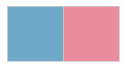

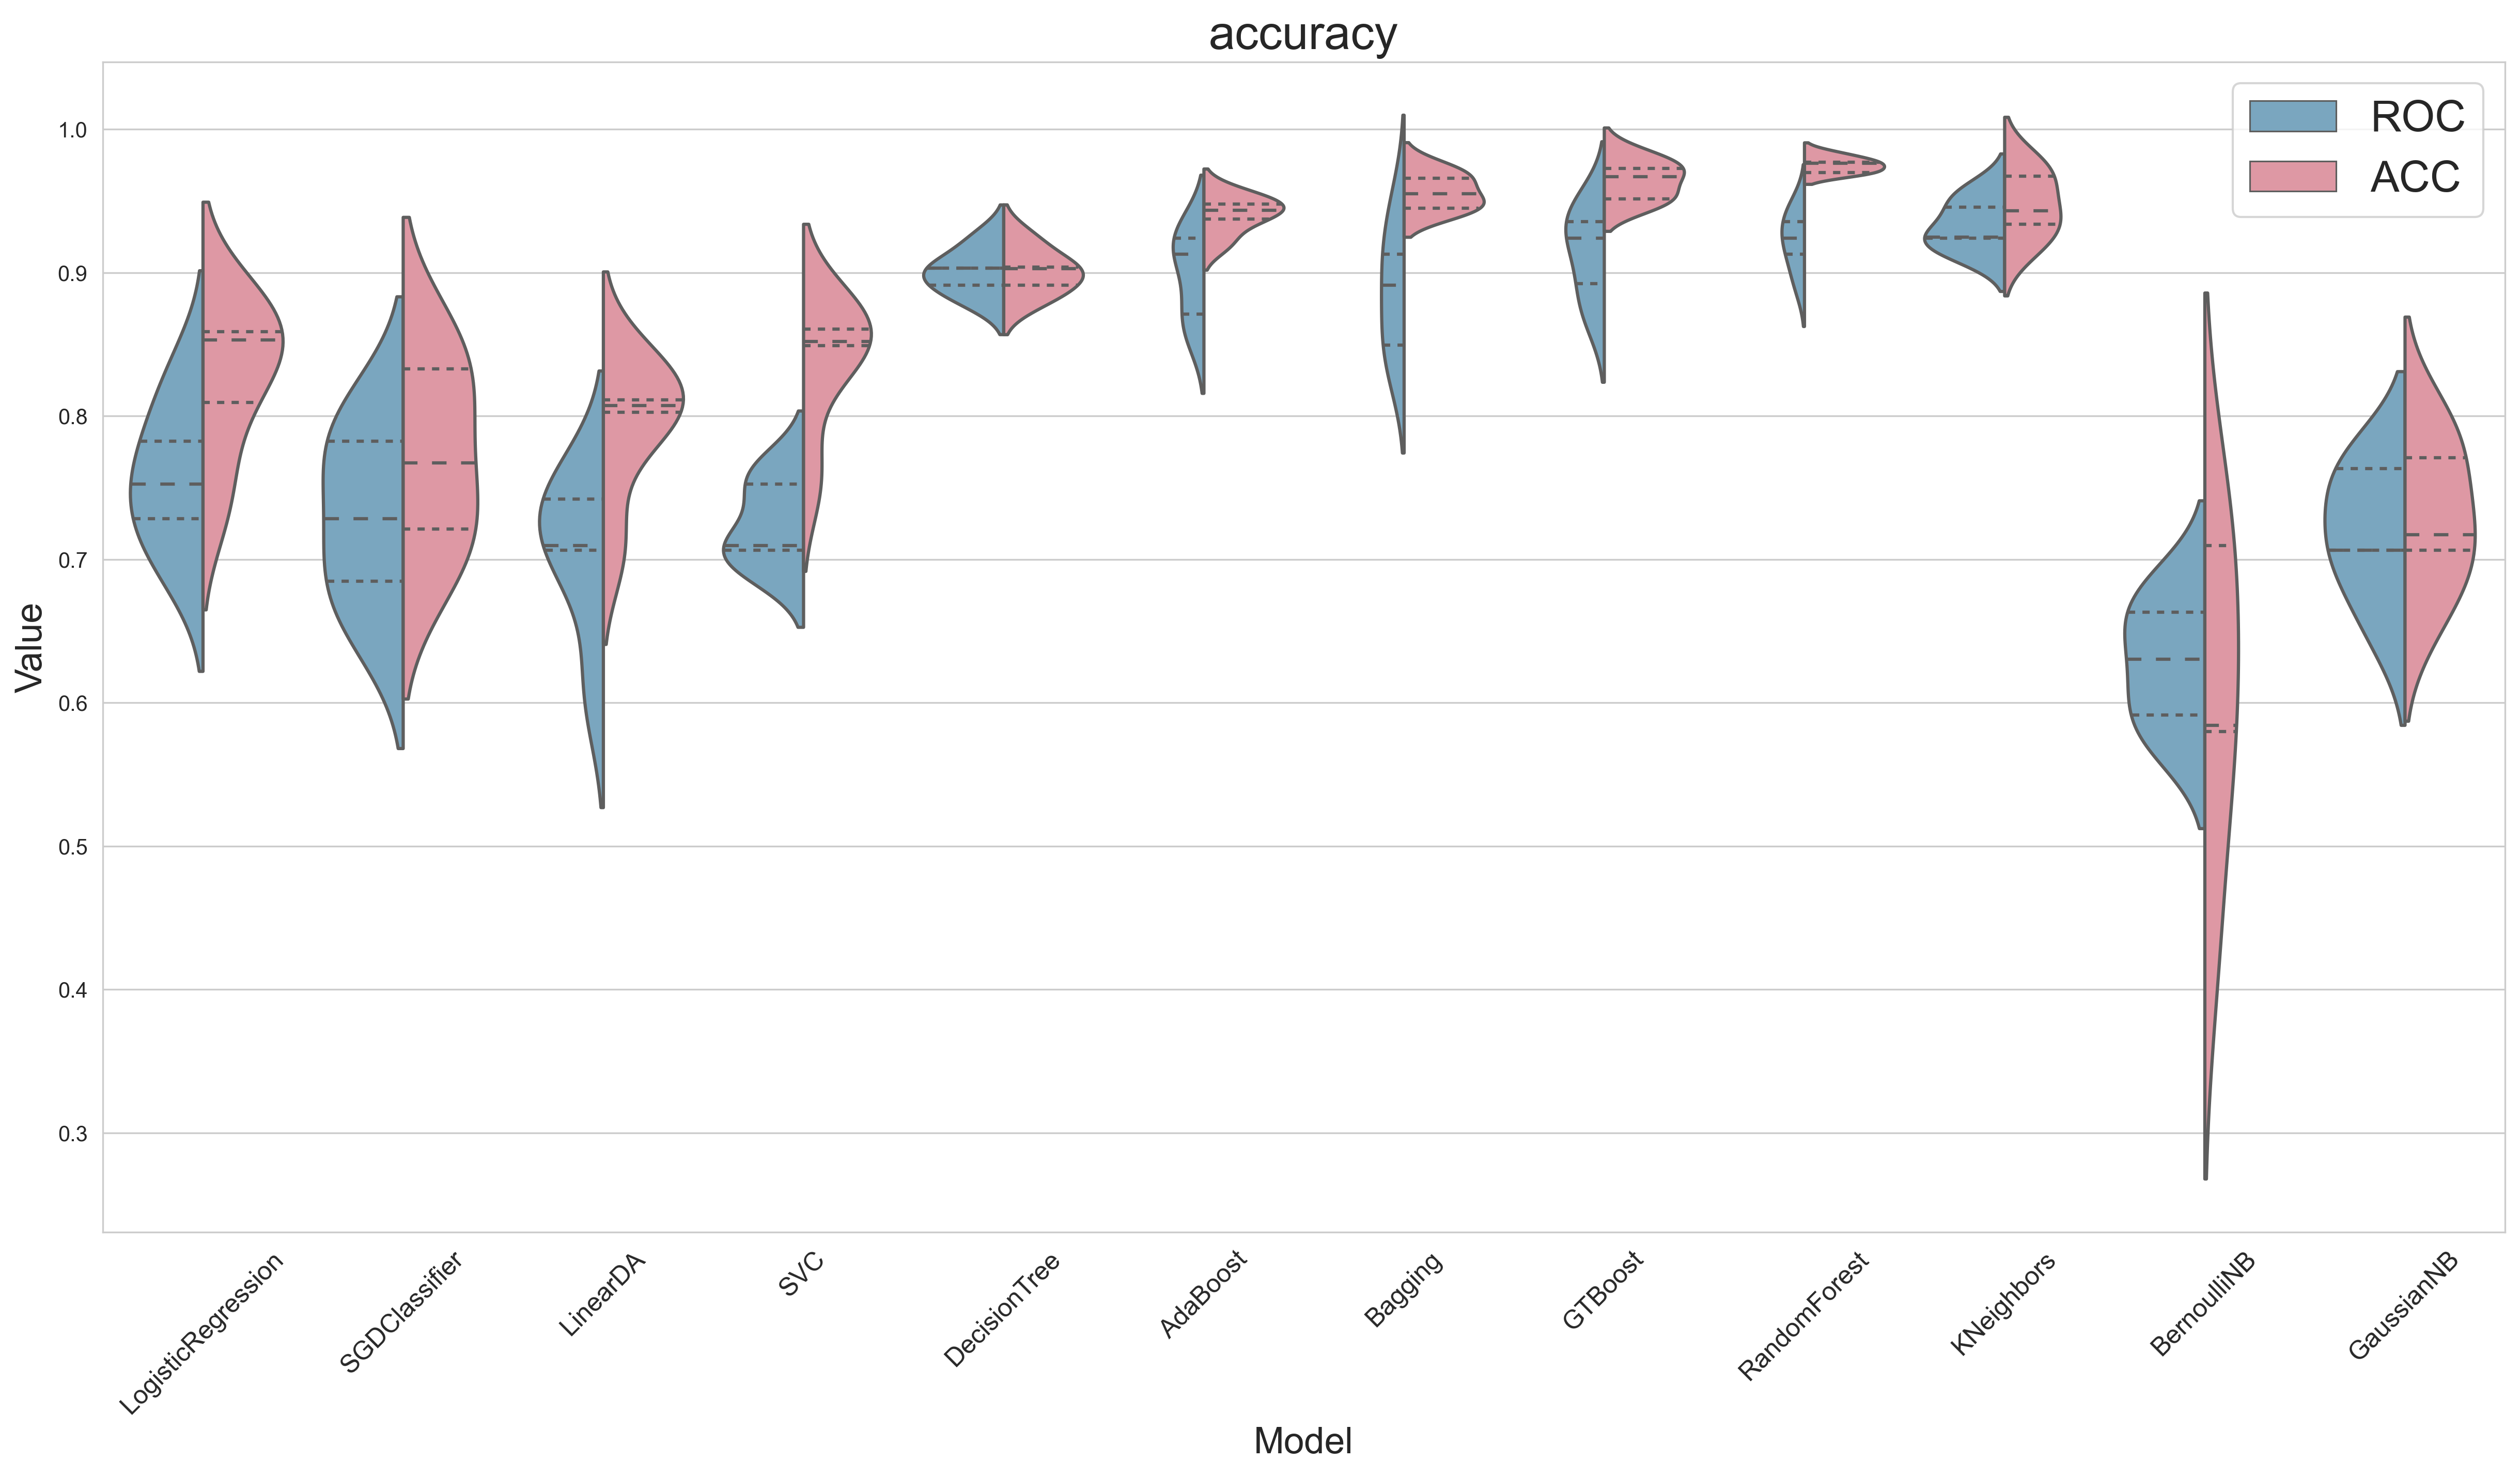

1.677231788635254


In [22]:
def estimator_violion(df1,df2,fig_name):
    """
    :param df1: 小提琴左侧的函数
    :param df2: 小提琴右侧的函数
    :return:  小提琴图
    """
    colors = [
        '#00429d', '#2653a5', '#3a64ad', '#4b75b4', '#5b87bc', '#6b99c3',
        '#7bacca', '#8cbed0', '#9fd0d6', '#b5e2dc', '#d1f3e0', '#ffffe0'
    ]

    # 处理A数据
    aa = df1.T
    aa.describe()
    # 处理B数据
    bb = df2.T
    bb.describe()
    # 处理合并数据
    AA = aa.melt()
    AA.columns = ["Model_A", "ROC"]
    df_A = AA
    BB = bb.melt()
    BB.columns = ["Model_B", "ACC"]
    df_B = BB
    df_AB = pd.concat([df_A, df_B], axis=1)
    df_AB_fig = df_AB.drop("Model_B", axis=1)
    df_AB_fig.columns = ["Model", "ROC", "ACC"]
    df_AB_fig_1 = pd.melt(df_AB_fig, id_vars="Model", value_name="Value")

    # 下面开始绘图
    pal2 = sns.color_palette(['#6fa9ca', '#ea8c9c'])
    sns.set_palette(pal2)
    sns.palplot(pal2)
    fig = plt.figure(figsize=(20, 10), dpi=300)
    sns.violinplot(x="Model",
                   y="Value",
                   hue="variable",
                   data=df_AB_fig_1,
                   split=True, inner="quartile",
                   )
    # Decoration

    plt.title(fig_name, fontsize=22)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)  # get函数得到原来默认的参数
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
    ax.legend(fontsize=20)
    plt.show()

    return fig

a = time()
tmp = estimator_violion(Auc_data, Acc_data,"accuracy")
b = time()
print(b-a)